In [1]:
#import library
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans


In [2]:
#Load the Dataset
X, y = load_iris(return_X_y=True)

In [3]:
#Elbow Method
#Find optimum number of cluster
#SUM OF SQUARED ERROR
sse = []
for k in range(1,11):
    km = KMeans(n_clusters=k, random_state=2)
    km.fit(X)
    sse.append(km.inertia_)

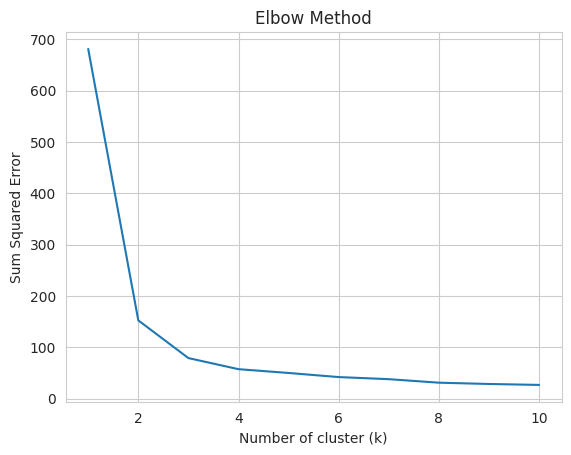

In [4]:
#Plot the Elbow graph to find the optimum number of cluster
sns.set_style("whitegrid")
g=sns.lineplot(x=range(1,11), y=sse)

g.set(xlabel ="Number of cluster (k)",
      ylabel = "Sum Squared Error",
      title ='Elbow Method')

plt.show()

In [5]:
#Build the Kmeans clustering model
kmeans = KMeans(n_clusters = 3, random_state = 2)
kmeans.fit(X)

KMeans(n_clusters=3, random_state=2)

In [6]:
#Find the cluster center
kmeans.cluster_centers_

array([[5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [5.006     , 3.428     , 1.462     , 0.246     ],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

In [7]:
#Predict the cluster group:
pred = kmeans.fit_predict(X)
pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0], dtype=int32)

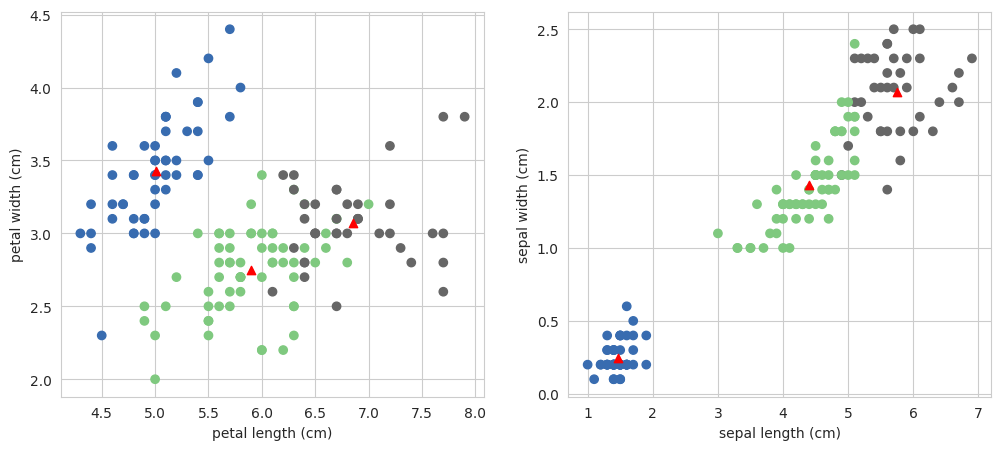

In [8]:
#Plot the cluster center with data points
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
plt.scatter(X[:,0],X[:,1],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[:2]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("petal length (cm)")
plt.ylabel("petal width (cm)")

plt.subplot(1,2,2)
plt.scatter(X[:,2],X[:,3],c = pred, cmap=cm.Accent)
plt.grid(True)
for center in kmeans.cluster_centers_:
    center = center[2:4]
    plt.scatter(center[0],center[1],marker = '^',c = 'red')
plt.xlabel("sepal length (cm)")
plt.ylabel("sepal width (cm)")
plt.show()